# Classification of Phishing websites using ML algorithms

In [1]:
#Loading the dataset into pandas dataframe and inspecting it 
import pandas as pd
df=pd.read_csv("D:\\seminar-basepaper & ds\\Phishing_website_dataset.csv")
df

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,11051,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,11052,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,11053,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,0,1,-1
11053,11054,-1,-1,1,1,1,-1,-1,-1,1,...,-1,1,1,1,1,-1,1,1,1,-1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [3]:
df.describe()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.isnull().sum()

index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

In [5]:
df.dtypes

index                          int64
having_IPhaving_IP_Address     int64
URLURL_Length                  int64
Shortining_Service             int64
having_At_Symbol               int64
double_slash_redirecting       int64
Prefix_Suffix                  int64
having_Sub_Domain              int64
SSLfinal_State                 int64
Domain_registeration_length    int64
Favicon                        int64
port                           int64
HTTPS_token                    int64
Request_URL                    int64
URL_of_Anchor                  int64
Links_in_tags                  int64
SFH                            int64
Submitting_to_email            int64
Abnormal_URL                   int64
Redirect                       int64
on_mouseover                   int64
RightClick                     int64
popUpWidnow                    int64
Iframe                         int64
age_of_domain                  int64
DNSRecord                      int64
web_traffic                    int64
P

In [6]:
dup=df[df.duplicated()]
print(f"Number of duplicate rows: {dup.shape[0]}")

Number of duplicate rows: 0


# Data pre-processing 

In [7]:
# Drop the index column
df.drop(columns=['index'], inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Standardize column names (replace multiple underscores)
df.columns = [col.replace("__", "_") for col in df.columns]

# Check class distribution
print("Class Distribution:\n", df['Result'].value_counts())


Class Distribution:
 Result
-1    3019
 1    2830
Name: count, dtype: int64


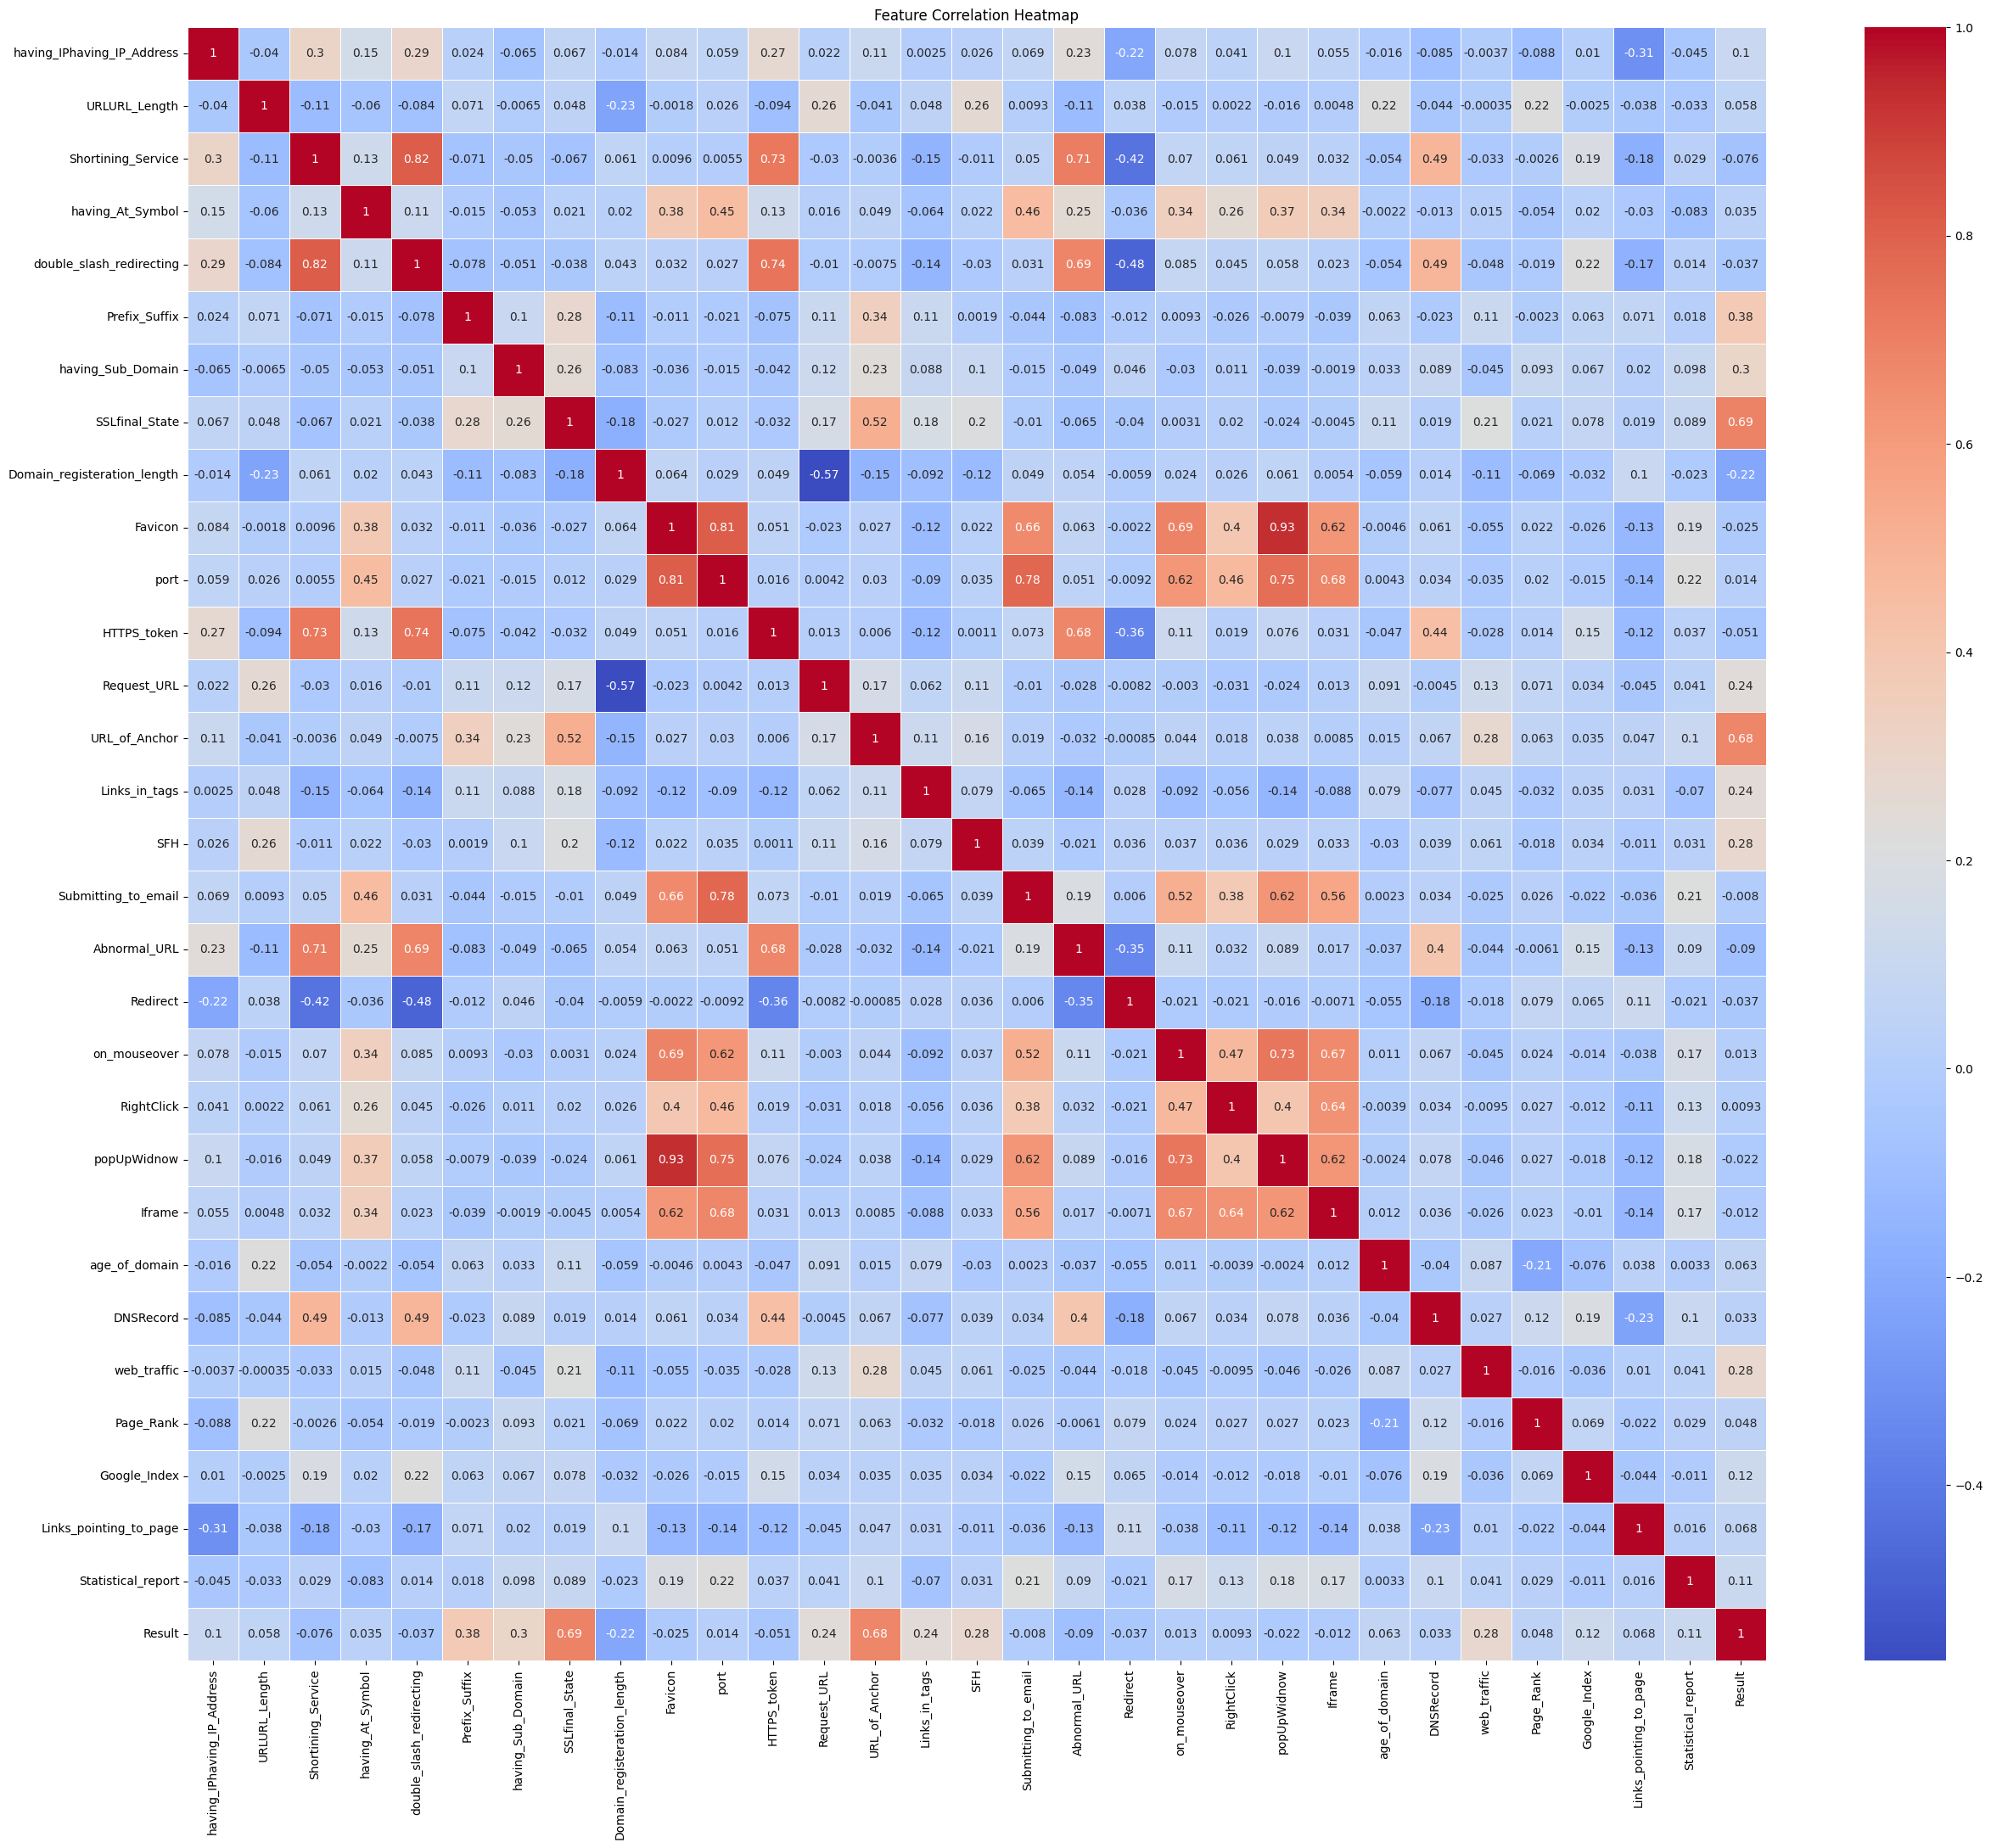

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(30,25))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [9]:
df.drop(columns=['RightClick', 'Favicon','port','Iframe','on_mouseover', 'Abnormal_URL', 'double_slash_redirecting', 'Shortining_Service' ], inplace=True)


In [10]:
df.columns

Index(['having_IPhaving_IP_Address', 'URLURL_Length', 'having_At_Symbol',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'HTTPS_token', 'Request_URL',
       'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email',
       'Redirect', 'popUpWidnow', 'age_of_domain', 'DNSRecord', 'web_traffic',
       'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')

# Feature selection

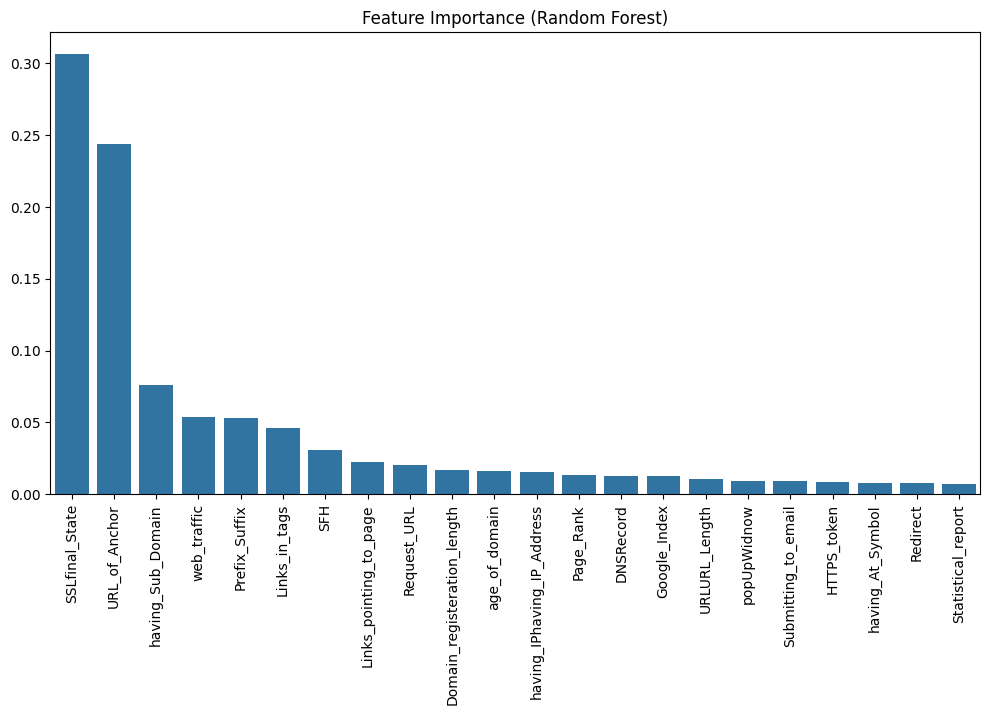

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Split features and target
X = df.drop(columns=['Result'])
y = df['Result']

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance
importances = rf.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=np.array(feature_names)[sorted_indices], y=importances[sorted_indices])
plt.xticks(rotation=90)
plt.title("Feature Importance (Random Forest)")
plt.show()


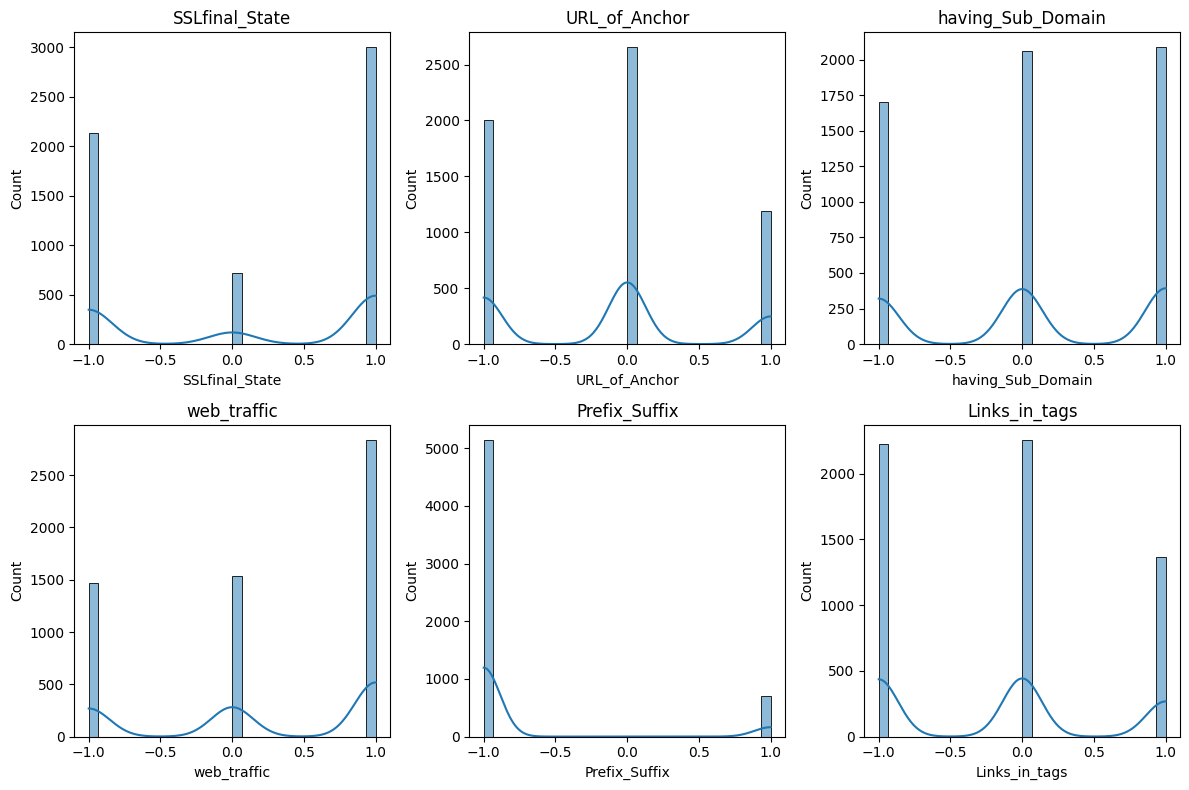

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of key features
plt.figure(figsize=(12, 8))
selected_features = ['SSLfinal_State','URL_of_Anchor','having_Sub_Domain', 'web_traffic', 'Prefix_Suffix', 'Links_in_tags']

for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()


In [13]:
from scipy.stats import skew

skewness = df[selected_features].apply(lambda x: skew(x))
print("Feature Skewness:\n", skewness)


Feature Skewness:
 SSLfinal_State      -0.299292
URL_of_Anchor        0.217206
having_Sub_Domain   -0.119236
web_traffic         -0.457128
Prefix_Suffix        2.340932
Links_in_tags        0.257277
dtype: float64


In [14]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectFromModel, VarianceThreshold
from sklearn.linear_model import LassoCV

# Separate features and target variable
X = df.drop(columns=["Result"])  # Assuming "Result" is the target column
y = df["Result"]

# Step 1: Feature Importance using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
top_n = 11  # Select the top 11 features
top_features_rf = feature_importance.nlargest(top_n).index.tolist()

# Step 2: Recursive Feature Elimination (RFE)
rfe = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=11)
rfe.fit(X, y)
selected_rfe_features = list(X.columns[rfe.support_])

# Step 3: LASSO (L1 Regularization)
lasso = LassoCV(cv=5, random_state=42).fit(X, y)
selected_lasso_features = list(X.columns[lasso.coef_ != 0])

# Step 4: Variance Thresholding
selector = VarianceThreshold(threshold=0.01)  # Removing low-variance features
selector.fit(X)
selected_variance_features = list(X.columns[selector.get_support()])

# Combine results: Take features appearing in at least two methods
from collections import Counter
all_selected_features = top_features_rf + selected_rfe_features + selected_lasso_features + selected_variance_features
feature_counts = Counter(all_selected_features)
final_selected_features = [feature for feature, count in feature_counts.items() if count >= 2]

# If more than 11, keep the top 11 based on feature importance
final_selected_features = final_selected_features[:11] if len(final_selected_features) > 11 else final_selected_features

# Final dataset with selected features
X_selected = X[final_selected_features]

# Display selected features
print("Selected Features:", final_selected_features)


Selected Features: ['SSLfinal_State', 'URL_of_Anchor', 'having_Sub_Domain', 'web_traffic', 'Prefix_Suffix', 'Links_in_tags', 'SFH', 'Links_pointing_to_page', 'Request_URL', 'Domain_registeration_length', 'age_of_domain']


In [15]:
#Random Forest model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Selected Features:", final_selected_features)
print(f"Random Forest Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

Selected Features: ['SSLfinal_State', 'URL_of_Anchor', 'having_Sub_Domain', 'web_traffic', 'Prefix_Suffix', 'Links_in_tags', 'SFH', 'Links_pointing_to_page', 'Request_URL', 'Domain_registeration_length', 'age_of_domain']
Random Forest Accuracy: 0.9291
Classification Report:
               precision    recall  f1-score   support

          -1       0.94      0.93      0.93       620
           1       0.92      0.93      0.92       550

    accuracy                           0.93      1170
   macro avg       0.93      0.93      0.93      1170
weighted avg       0.93      0.93      0.93      1170



In [16]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Convert -1 to 0 in target variable
y = y.replace(-1, 0)  # If y is a pandas Series

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, stratify=y, random_state=42)

# Initialize XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


C:\Users\Priyadharshini\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:13:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9376068376068376
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       604
           1       0.94      0.93      0.93       566

    accuracy                           0.94      1170
   macro avg       0.94      0.94      0.94      1170
weighted avg       0.94      0.94      0.94      1170

[[573  31]
 [ 42 524]]


In [17]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Base model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Grid to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
}

# Grid search setup
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Run the search
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}
Best Accuracy: 0.9378074866310161


C:\Users\Priyadharshini\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:14:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [18]:
best_model = XGBClassifier(
    n_estimators=200,
    max_depth=3,
    learning_rate=0.1,
    subsample=1,
    colsample_bytree=1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


C:\Users\Priyadharshini\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:14:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.94      0.93      0.94       604
           1       0.93      0.94      0.93       566

    accuracy                           0.94      1170
   macro avg       0.93      0.94      0.93      1170
weighted avg       0.94      0.94      0.94      1170

[[564  40]
 [ 36 530]]


In [19]:
from sklearn.metrics import roc_auc_score

y_proba = best_model.predict_proba(X_test)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


ROC-AUC Score: 0.9862884070858587


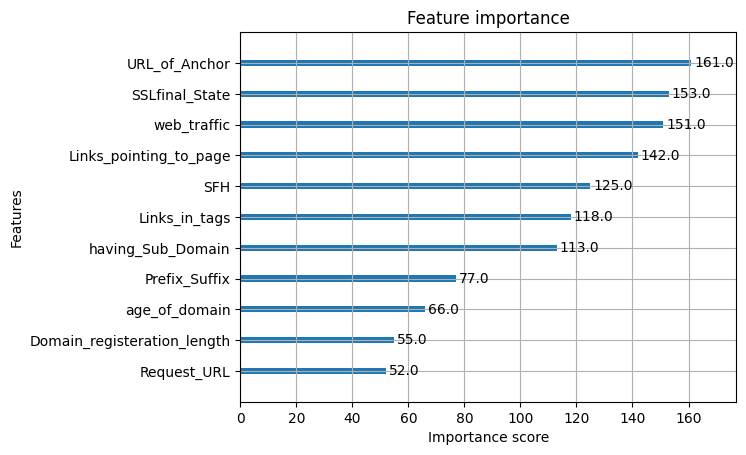

In [20]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(best_model, max_num_features=11)
plt.show()


In [21]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

# 1. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 2. Define base models
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
xgb = XGBClassifier(n_estimators=200, max_depth=3, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42)

# 3. Define stacking model
stacked_model = StackingClassifier(
    estimators=[('rf', rf), ('xgb', xgb)],
    final_estimator=LogisticRegression(),
    cv=5,
    n_jobs=-1,
    passthrough=True  # Optional: allows meta-model to see original features too
)

# 4. Train
stacked_model.fit(X_train, y_train)

# 5. Predict and Evaluate
y_pred = stacked_model.predict(X_test)
y_proba = stacked_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("Stacked ROC-AUC:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.95      0.95      0.95       604
           1       0.94      0.95      0.95       566

    accuracy                           0.95      1170
   macro avg       0.95      0.95      0.95      1170
weighted avg       0.95      0.95      0.95      1170

Stacked ROC-AUC: 0.9909232911333162


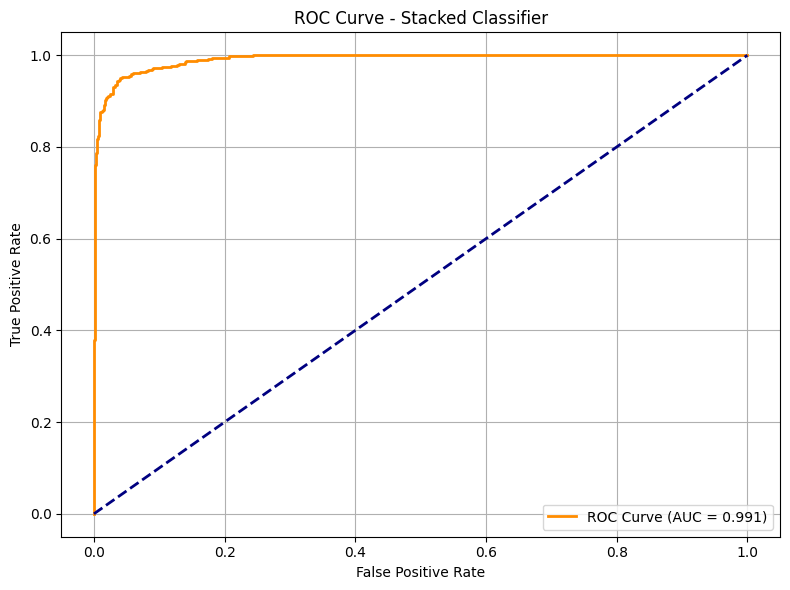

In [22]:
#Plot ROC-AUC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute the area under the curve
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Stacked Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
